<h2>EDA - Análisis exploratorio de los datos sobre taxis en Nueva York</h2>

<h3>Contexto</h3>

<p style="font-size:16px;">Los servicios de transporte en Nueva York, como los taxis y Uber, han revolucionado la movilidad urbana. Estas alternativas ofrecen una forma conveniente y accesible de desplazarse, transformando la percepción sobre el transporte público y el alquiler de coches.</p>

<p style="font-size:16px;">El problema del cambio climático, provocado en gran medida por el uso de energías provenientes de combustibles fósiles en los vehículos, ha alcanzado niveles críticos. Las compañías se ven instadas a actuar frente a estos desafíos ambientales, lo que implica la necesidad de medir y mejorar los niveles de consumo y generación energética. Esta conciencia conduce a la búsqueda de soluciones para mitigar dicho impacto en el medio ambiente. </p>

<h3>Objetivos</h3>

<p style="font-size:16px;">El objetivo es realizar un EDA (Análisis exploratorio de los datos) para poder encontrar relaciones en los datos que nos permitan realizar un análisis profundo y encontrar posibles causas y conclusiones a la hora de abordar la problemática de los taxis en Nueva York.</p>

<p style="font-size:16px;">En este EDA abordaremos:</p>

<ul>
  <li>Posibles valores nulos</li>
  <li>Posibles registros duplicados</li>
  <li>Posibles valores outliers</li>
  <li>Gráficos representativos con su correspondiente análisis</li>
  <li>Conclusiones</li>
</ul>

<p style="font-size:17px;"><u>Importo las librerías a utilizar</u> </p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<p style="font-size:17px;"><u>Lectura de los datos disponibles</u></p>


<p style="font-size:15px;">Observo los datos y columnas del dataset de los taxis amarillos</p>

In [5]:
# TAXIS AMARILLOS
df_yellow_taxis = pd.read_parquet('yellow_taxis.parquet')

df_yellow_taxis.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [10]:
df_yellow_taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

<p style="font-size:15px;">Observo los datos y columnas del dataset de los taxis verdes</p>

In [8]:
# TAXIS VERDES
df_green_taxis = pd.read_parquet('green_taxis.parquet')

# Muestra las primeras filas del DataFrame
df_green_taxis.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2024-01-01 00:46:55,2024-01-01 00:58:25,N,1.0,236,239,1.0,1.98,12.8,1.0,0.5,3.61,0.0,NaN,1.0,21.66,1.0,1.0,2.75
1,2,2024-01-01 00:31:42,2024-01-01 00:52:34,N,1.0,65,170,5.0,6.54,30.3,1.0,0.5,7.11,0.0,NaN,1.0,42.66,1.0,1.0,2.75
2,2,2024-01-01 00:30:21,2024-01-01 00:49:23,N,1.0,74,262,1.0,3.08,19.8,1.0,0.5,3.00,0.0,NaN,1.0,28.05,1.0,1.0,2.75
3,1,2024-01-01 00:30:20,2024-01-01 00:42:12,N,1.0,74,116,1.0,2.40,14.2,1.0,1.5,0.00,0.0,NaN,1.0,16.70,2.0,1.0,0.00
4,2,2024-01-01 00:32:38,2024-01-01 00:43:37,N,1.0,74,243,1.0,5.14,22.6,1.0,0.5,6.28,0.0,NaN,1.0,31.38,1.0,1.0,0.00


In [12]:
df_green_taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56551 entries, 0 to 56550
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56551 non-null  int32         
 1   lpep_pickup_datetime   56551 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56551 non-null  datetime64[us]
 3   store_and_fwd_flag     53136 non-null  object        
 4   RatecodeID             53136 non-null  float64       
 5   PULocationID           56551 non-null  int32         
 6   DOLocationID           56551 non-null  int32         
 7   passenger_count        53136 non-null  float64       
 8   trip_distance          56551 non-null  float64       
 9   fare_amount            56551 non-null  float64       
 10  extra                  56551 non-null  float64       
 11  mta_tax                56551 non-null  float64       
 12  tip_amount             56551 non-null  float64       
 13  t

<p style="font-size:18px;"><u>Verificación de la existencia de valores nulos</u> </p>

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de taxis amarillos</p>

In [13]:
df_yellow_taxis.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140162
trip_distance                 0
RatecodeID               140162
store_and_fwd_flag       140162
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     140162
Airport_fee              140162
dtype: int64

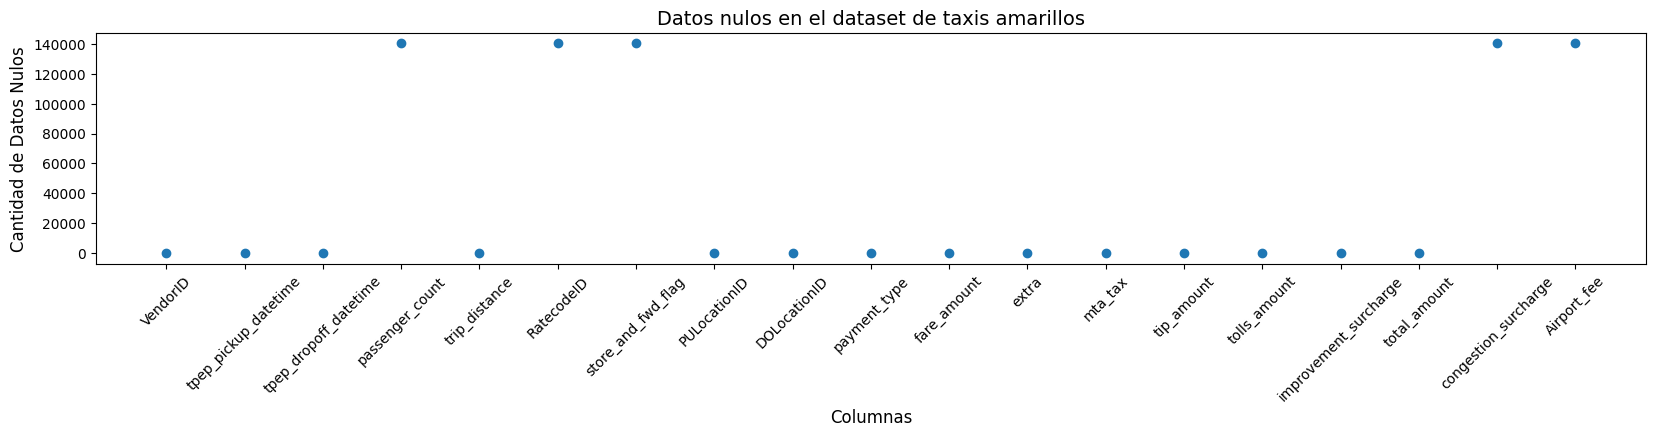

In [15]:
yellow_nulos = df_yellow_taxis.isnull().sum()

plt.figure(figsize=(20, 3))
plt.scatter(yellow_nulos.index, yellow_nulos.values)
plt.title('Datos nulos en el dataset de taxis amarillos', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Datos Nulos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<p style="font-size:15px;">Borro los registros con datos nulos</p>

In [16]:
df_yellow_taxis_cleaned = df_yellow_taxis.dropna(subset=['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'Airport_fee'])


In [17]:
df_yellow_taxis_cleaned.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

<p style="font-size:15px;">Verifico la existencia de valores nulos en el dataset de taxis verdes</p>

In [18]:
df_green_taxis.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        3415
RatecodeID                3415
PULocationID                 0
DOLocationID                 0
passenger_count           3415
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                56551
improvement_surcharge        0
total_amount                 0
payment_type              3415
trip_type                 3418
congestion_surcharge      3415
dtype: int64

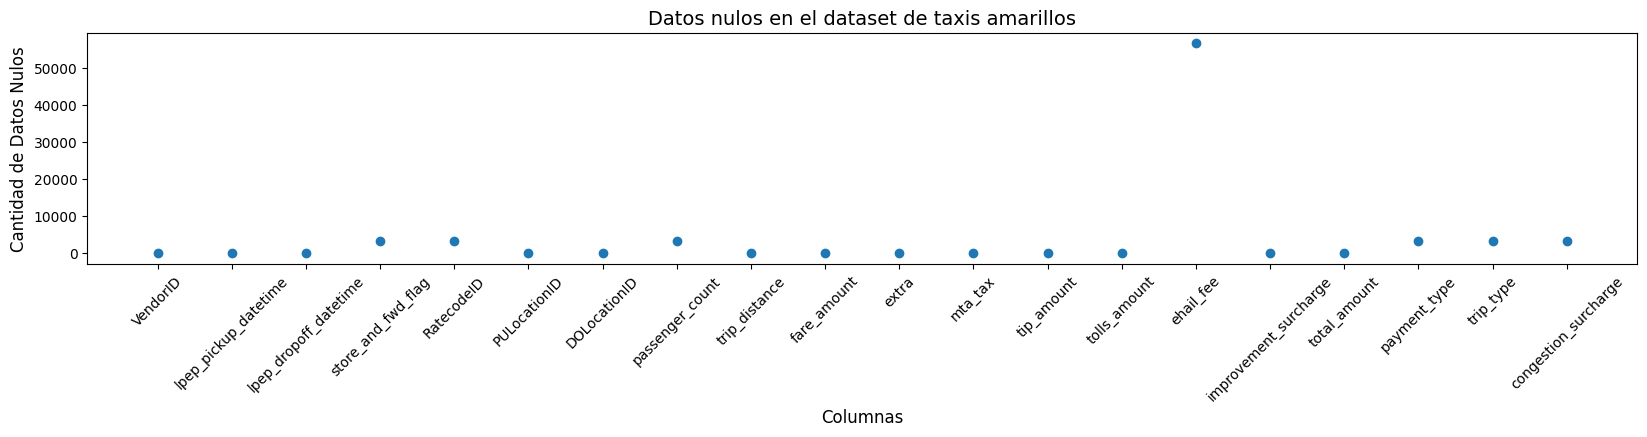

In [19]:
green_nulos = df_green_taxis.isnull().sum()

plt.figure(figsize=(20, 3))
plt.scatter(green_nulos.index, green_nulos.values)
plt.title('Datos nulos en el dataset de taxis amarillos', fontsize=14)
plt.xlabel('Columnas', fontsize=12)
plt.ylabel('Cantidad de Datos Nulos', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

<p style="font-size:15px;">Borro los registros con datos nulos</p>

In [21]:
df_green_taxis_cleaned = df_green_taxis.dropna(subset=['store_and_fwd_flag', 'RatecodeID', 'passenger_count', 'ehail_fee', 'payment_type', 'trip_type', 'congestion_surcharge'])

In [22]:
df_green_taxis_cleaned.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
ehail_fee                0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
dtype: int64